##### Section 4.1: Master Dark and Flat Corrections

In [1]:
# Importing necessary libraries 
import numpy as np
from scipy import stats
from astropy.io import fits
from astropy.visualization import ZScaleInterval
zscale = ZScaleInterval()
import matplotlib.pyplot as plt
import os
import astropy

In [2]:
def read_fits_range(file_template, start_idx, end_idx):
    """
    Read a range of FITS files based on the template and indices.

    :param file_template: Template path for the FITS files with placeholders for the frame number.
    :type file_template: str
    :param start_idx: The starting index for the FITS files.
    :type start_idx: int
    :param end_idx: The ending index for the FITS files.
    :type end_idx: int
    :return: A list of tuples containing headers and data for each FITS file.
    :rtype: list of tuples
    """
    frames_info = []
    for i in range(start_idx, end_idx + 1):
        file_path = file_template.format(i)  # Create file path from template and index
        with fits.open(file_path) as hdul:
            header = hdul[0].header  # Extract header
            data = hdul[0].data  # Extract image data
            frames_info.append((header, data))  # Append header and data as a tuple
    return frames_info  # Return list of header and data tuples

In [ ]:
def read_calibration_fits(bias_template, bias_start, bias_end, 
                          dark_light_template, dark_light_start, dark_light_end, 
                          dark_flat_template, dark_flat_start, dark_flat_end, 
                          light_template, light_start, light_end, 
                          flat_template, flat_start, flat_end):
    """
    Read calibration FITS files for bias frames, dark frames, flat fields, and light frames.

    :param bias_template: Template path for the bias frames with placeholders for the frame number.
    :type bias_template: str
    :param bias_start: Starting index for the bias frames.
    :type bias_start: int
    :param bias_end: Ending index for the bias frames.
    :type bias_end: int
    :param dark_light_template: Template path for the dark frames used for light frames.
    :type dark_light_template: str
    :param dark_light_start: Starting index for the dark frames used for light frames.
    :type dark_light_start: int
    :param dark_light_end: Ending index for the dark frames used for light frames.
    :type dark_light_end: int
    :param dark_flat_template: Template path for the dark frames used for flat fields.
    :type dark_flat_template: str
    :param dark_flat_start: Starting index for the dark frames used for flat fields.
    :type dark_flat_start: int
    :param dark_flat_end: Ending index for the dark frames used for flat fields.
    :type dark_flat_end: int
    :param light_template: Template path for the light frames.
    :type light_template: str
    :param light_start: Starting index for the light frames.
    :type light_start: int
    :param light_end: Ending index for the light frames.
    :type light_end: int
    :param flat_template: Template path for the flat field frames.
    :type flat_template: str
    :param flat_start: Starting index for the flat field frames.
    :type flat_start: int
    :param flat_end: Ending index for the flat field frames.
    :type flat_end: int
    :return: A tuple containing lists of headers and data for bias, dark-light, dark-flat, light, and flat frames.
    :rtype: tuple (list of tuples, list of tuples, list of tuples, list of tuples, list of tuples)
    """
    bias_frames = read_fits_range(bias_template, bias_start, bias_end)
    dark_light_frames = read_fits_range(dark_light_template, dark_light_start, dark_light_end)
    dark_flat_frames = read_fits_range(dark_flat_template, dark_flat_start, dark_flat_end)
    light_frames = read_fits_range(light_template, light_start, light_end)
    flat_frames = read_fits_range(flat_template, flat_start, flat_end)

    return bias_frames, dark_light_frames, dark_flat_frames, light_frames, flat_frames

# Define the file templates for each calibration frame type for DY_Peg
dy_peg_bias_frame_template = r"..\FITS_Files\Nov_5_DY_Peg\Dy_Peg_Bias_Frames_.{:08d}.BIAS.FIT"
dy_peg_dark_frame_light_template = r"..\FITS_Files\Nov_5_DY_Peg\Dy_Peg_Dark_Frames_.{:08d}.DARK.FIT"
dy_peg_dark_frame_flat_template = r"..\FITS_Files\Nov_5_DY_Peg\Dy_Peg_Dark_Frames_FOR_Flat_Fields_ONLY_.{:08d}.DARK.FIT"
dy_peg_light_frame_template = r"..\FITS_Files\Nov_5_DY_Peg\Dy_Peg_Light_Frames_.{:08d}.FIT"
dy_peg_flat_frame_template = r"..\FITS_Files\Nov_5_DY_Peg\Dy_Peg_Flat_Fields_.{:08d}.FLAT.FIT"

# Define the file templates for each calibration frame type for CY_Aqr
cy_aqr_bias_frame_template = r"..\FITS_Files\Nov_7_CY_Aqr\CY_Aqr_Bias_Frames_.{:08d}.BIAS.FIT"
cy_aqr_dark_frame_light_template = r"..\FITS_Files\Nov_7_CY_Aqr\CY_Aqr_Dark_Frames_.{:08d}.DARK.FIT"
cy_aqr_dark_frame_flat_template = r"..\FITS_Files\Nov_7_CY_Aqr\CY_Aqr_Dark_Frames_FOR_Flat_Fields_ONLY_.{:08d}.DARK.FIT"
cy_aqr_light_frame_template = r"..\FITS_Files\Nov_7_CY_Aqr\CY_Aqr_Light_Frames_.{:08d}.FIT"
cy_aqr_flat_frame_template = r"..\FITS_Files\Nov_7_CY_Aqr\CY_Aqr_Flat_Fields_.{:08d}.FLAT.FIT"

# Define the file templates for each calibration frame type for XX_Cyg
xx_cyg_bias_frame_template = r"..\FITS_Files\Nov_9_XX_Cyg\XX_Cyg_Bias_Frames_.{:08d}.BIAS.FIT"
xx_cyg_dark_frame_light_template = r"..\FITS_Files\Nov_9_XX_Cyg\XX_Cyg_Dark_Frames_.{:08d}.DARK.FIT"
xx_cyg_dark_frame_flat_template = r"..\FITS_Files\Nov_9_XX_Cyg\XX_Cyg_Dark_Frames_FOR_Flat_Fields_ONLY_.{:08d}.DARK.FIT"
xx_cyg_light_frame_template = r"..\FITS_Files\Nov_9_XX_Cyg\XX_Cyg_Light_Frames_.{:08d}.FIT"
xx_cyg_flat_frame_template = r"..\FITS_Files\Nov_9_XX_Cyg\XX_Cyg_Flat_Fields_.{:08d}.FLAT.FIT"

# Define the starting and ending indices for each type of frame for DY_Peg
dy_peg_bias_frame_start_index = 0
dy_peg_bias_frame_end_index = 9
dy_peg_dark_frame_light_start_index = 0
dy_peg_dark_frame_light_end_index = 9
dy_peg_dark_frame_flat_start_index = 0
dy_peg_dark_frame_flat_end_index = 9
dy_peg_light_frame_start_index = 0
dy_peg_light_frame_end_index = 240  # Ignore frames 67 to 71, and 122 for further analysis
dy_peg_flat_frame_start_index = 8
dy_peg_flat_frame_end_index = 17

# Define the starting and ending indices for each type of frame for CY_Aqr
cy_aqr_bias_frame_start_index = 0
cy_aqr_bias_frame_end_index = 9
cy_aqr_dark_frame_light_start_index = 19
cy_aqr_dark_frame_light_end_index = 27
cy_aqr_dark_frame_flat_start_index = 9
cy_aqr_dark_frame_flat_end_index = 18
cy_aqr_light_frame_start_index = 0
cy_aqr_light_frame_end_index = 199  # Ignore frames 180 to 200, for further analysis
cy_aqr_flat_frame_start_index = 0
cy_aqr_flat_frame_end_index = 9

# Define the starting and ending indices for each type of frame for XX_Cyg
xx_cyg_bias_frame_start_index = 0
xx_cyg_bias_frame_end_index = 9
xx_cyg_dark_frame_light_start_index = 0
xx_cyg_dark_frame_light_end_index = 9
xx_cyg_dark_frame_flat_start_index = 0
xx_cyg_dark_frame_flat_end_index = 9
xx_cyg_light_frame_start_index = 0
xx_cyg_light_frame_end_index = 349  # Ignore frames 25, 350, and 341 to 350, for further analysis
xx_cyg_flat_frame_start_index = 1
xx_cyg_flat_frame_end_index = 10

# Call the function to read the calibration FITS files for DY_Peg
dy_peg_bias_frames, dy_peg_dark_frame_light, dy_peg_dark_frame_flat, dy_peg_light_frame, dy_peg_flat_frame = read_calibration_fits(
    dy_peg_bias_frame_template, dy_peg_bias_frame_start_index, dy_peg_bias_frame_end_index,
    dy_peg_dark_frame_light_template, dy_peg_dark_frame_light_start_index, dy_peg_dark_frame_light_end_index,
    dy_peg_dark_frame_flat_template, dy_peg_dark_frame_flat_start_index, dy_peg_dark_frame_flat_end_index,
    dy_peg_light_frame_template, dy_peg_light_frame_start_index, dy_peg_light_frame_end_index,
    dy_peg_flat_frame_template, dy_peg_flat_frame_start_index, dy_peg_flat_frame_end_index
)

# Call the function to read the calibration FITS files for CY_Aqr
cy_aqr_bias_frames, cy_aqr_dark_frame_light, cy_aqr_dark_frame_flat, cy_aqr_light_frame, cy_aqr_flat_frame = read_calibration_fits(
    cy_aqr_bias_frame_template, cy_aqr_bias_frame_start_index, cy_aqr_bias_frame_end_index,
    cy_aqr_dark_frame_light_template, cy_aqr_dark_frame_light_start_index, cy_aqr_dark_frame_light_end_index,
    cy_aqr_dark_frame_flat_template, cy_aqr_dark_frame_flat_start_index, cy_aqr_dark_frame_flat_end_index,
    cy_aqr_light_frame_template, cy_aqr_light_frame_start_index, cy_aqr_light_frame_end_index,
    cy_aqr_flat_frame_template, cy_aqr_flat_frame_start_index, cy_aqr_flat_frame_end_index
)

# Call the function to read the calibration FITS files for XX_Cyg
xx_cyg_bias_frames, xx_cyg_dark_frame_light, xx_cyg_dark_frame_flat, xx_cyg_light_frame, xx_cyg_flat_frame = read_calibration_fits(
    xx_cyg_bias_frame_template, xx_cyg_bias_frame_start_index, xx_cyg_bias_frame_end_index,
    xx_cyg_dark_frame_light_template, xx_cyg_dark_frame_light_start_index, xx_cyg_dark_frame_light_end_index,
    xx_cyg_dark_frame_flat_template, xx_cyg_dark_frame_flat_start_index, xx_cyg_dark_frame_flat_end_index,
    xx_cyg_light_frame_template, xx_cyg_light_frame_start_index, xx_cyg_light_frame_end_index,
    xx_cyg_flat_frame_template, xx_cyg_flat_frame_start_index, xx_cyg_flat_frame_end_index
)

In [33]:
def create_master_dark(dark_frame_light_template, dark_frame_flat_template, star_name):
    """
    Create master dark frames for light and flat field frames by median-combining the dark frames.

    :param dark_frame_light_template: List of tuples containing headers and data for light frame darks.
    :type dark_frame_light_template: list of tuples
    :param dark_frame_flat_template: List of tuples containing headers and data for flat field darks.
    :type dark_frame_flat_template: list of tuples
    :param star_name: Name of the star for which the master dark frames are being created.
    :type star_name: str
    :return: Master dark frames for light and flat fields after median combination.
    :rtype: tuple of np.ndarrays
    """
    # Extract data from dark frame templates
    dark_light_data_list = [frame[1] for frame in dark_frame_light_template]
    dark_flat_data_list = [frame[1] for frame in dark_frame_flat_template]
    # Median combine dark frames
    master_dark_l = np.median(np.array(dark_light_data_list), axis=0)
    master_dark_f = np.median(np.array(dark_flat_data_list), axis=0)
    
    # Plot master dark for light frames
    plt.figure(figsize=(10, 6))
    plt.imshow(master_dark_l, cmap='gray', origin='lower', aspect='auto', vmax=1500)
    plt.colorbar(label='Pixel Intensity')
    plt.xlabel('Pixels (Dispersion)')
    plt.ylabel('Pixels (Spatial)')
    plt.title(f'Master Dark Frame for Light Frames ({star_name})')
    plt.grid(False)
    plt.show()

    # Plot master dark for flat frames
    plt.figure(figsize=(10, 6))
    plt.imshow(master_dark_f, cmap='gray', origin='lower', aspect='auto', vmax=1500)
    plt.colorbar(label='Pixel Intensity')
    plt.xlabel('Pixels (Dispersion)')
    plt.ylabel('Pixels (Spatial)')
    plt.title(f'Master Dark Frame for Flat Frames ({star_name})')
    plt.grid(False)
    plt.show()

    return master_dark_l, master_dark_f

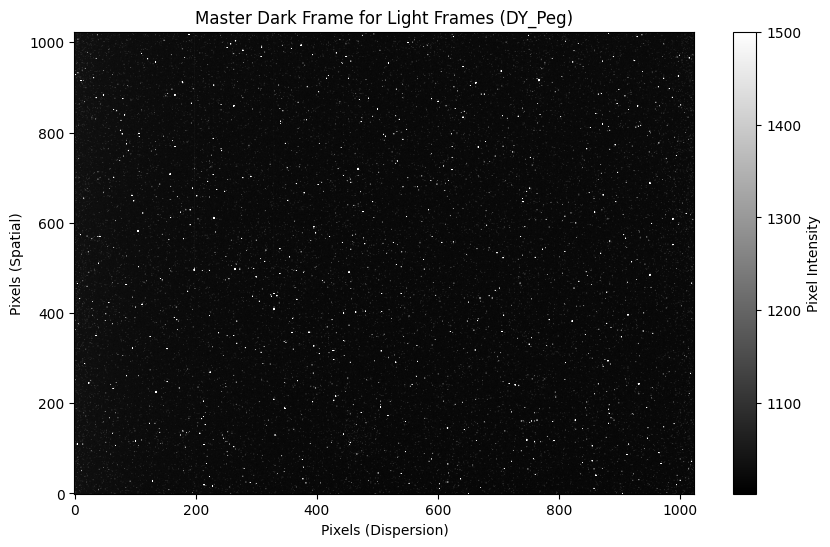

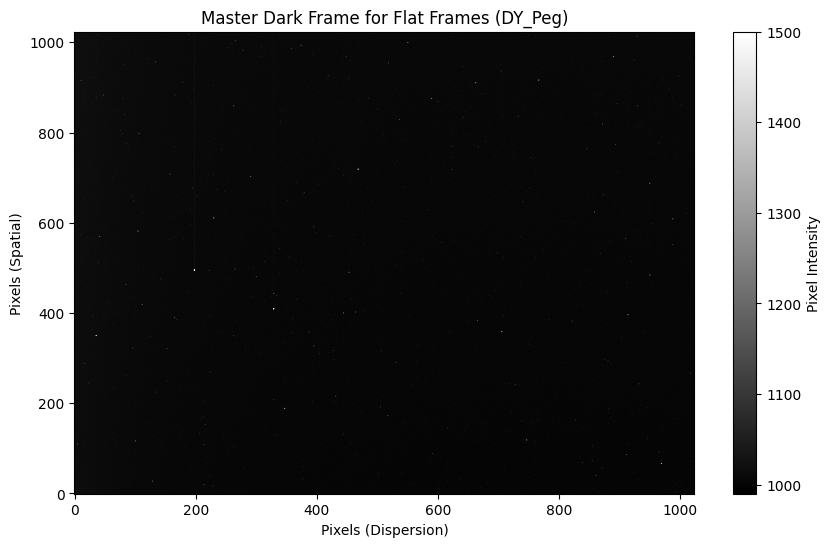

In [34]:
# Read DY_Peg dark frames for light and flat fields
dy_peg_dark_frame_light = read_fits_range(
    dy_peg_dark_frame_light_template, dy_peg_dark_frame_light_start_index, dy_peg_dark_frame_light_end_index
    )
dy_peg_dark_frame_flat = read_fits_range(
    dy_peg_dark_frame_flat_template, dy_peg_dark_frame_flat_start_index, dy_peg_dark_frame_flat_end_index
    )

# Create master dark frames for DY_Peg
dy_peg_master_dark_l, dy_peg_master_dark_f = create_master_dark(
    dy_peg_dark_frame_light, dy_peg_dark_frame_flat, "DY_Peg"
)

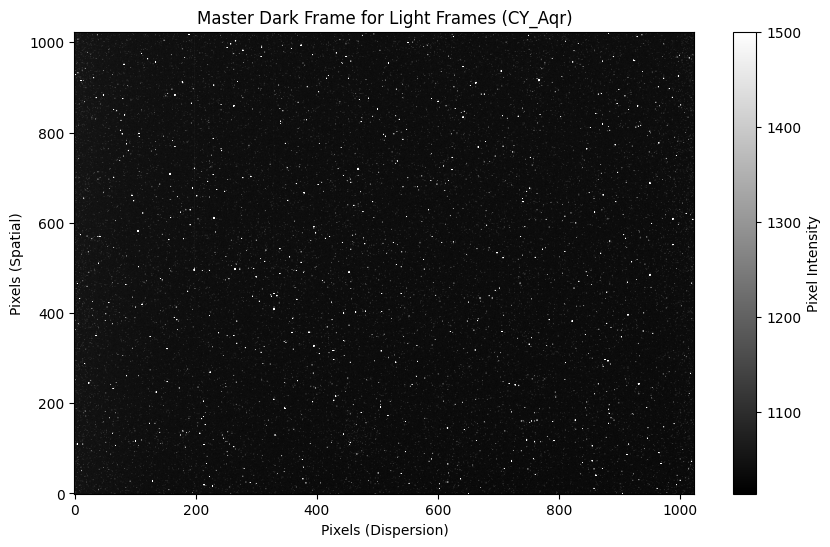

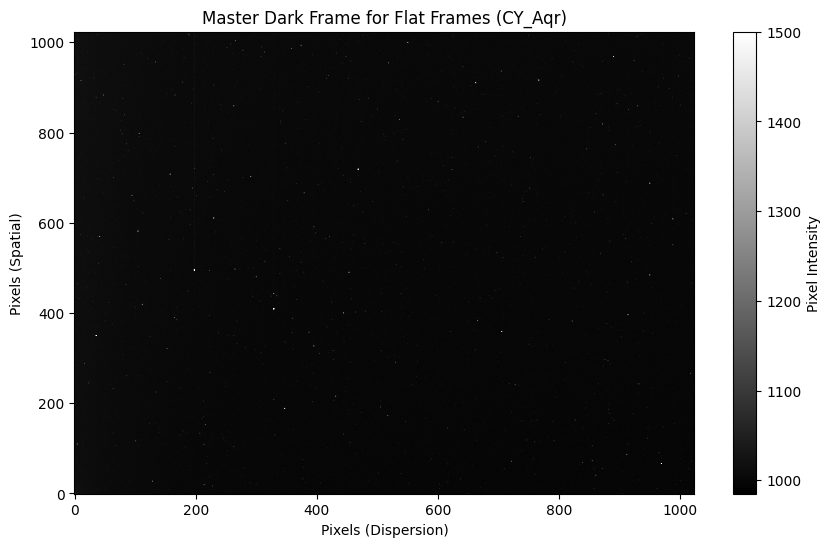

In [35]:
# Read CY_Aqr dark frames for light and flat fields
cy_aqr_dark_frame_light = read_fits_range(
    cy_aqr_dark_frame_light_template, cy_aqr_dark_frame_light_start_index, cy_aqr_dark_frame_light_end_index
    )
cy_aqr_dark_frame_flat = read_fits_range(
    cy_aqr_dark_frame_flat_template, cy_aqr_dark_frame_flat_start_index, cy_aqr_dark_frame_flat_end_index
    )

# Create master dark frames for CY_Aqr
cy_aqr_master_dark_l, cy_aqr_master_dark_f = create_master_dark(
    cy_aqr_dark_frame_light, cy_aqr_dark_frame_flat, "CY_Aqr"
)

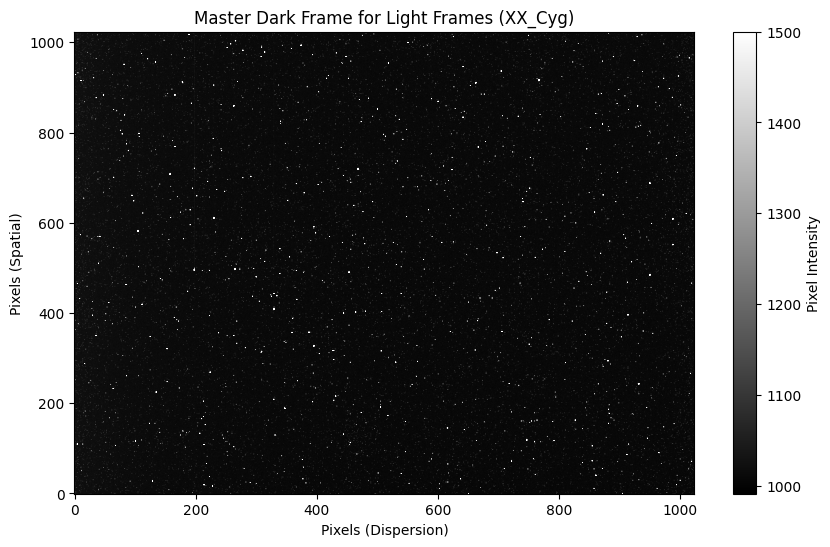

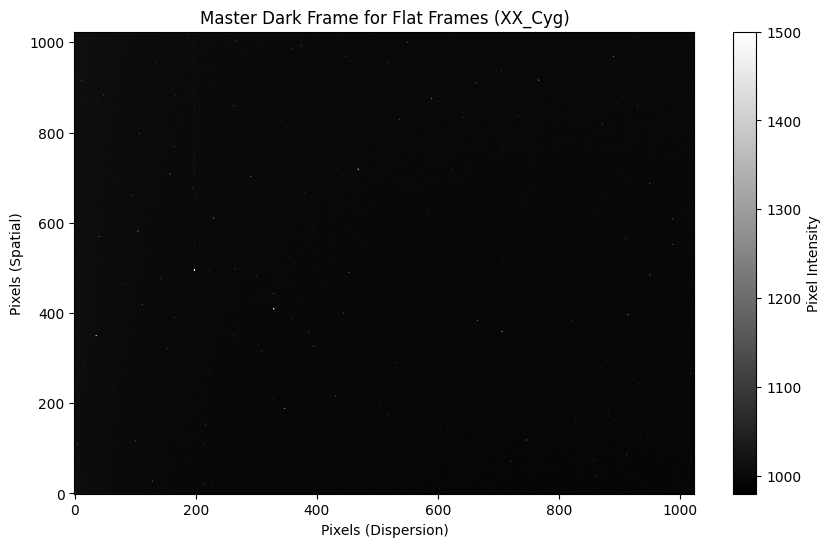

In [36]:
# Read XX_Cyg dark frames for light and flat fields
xx_cyg_dark_frame_light = read_fits_range(
    xx_cyg_dark_frame_light_template, xx_cyg_dark_frame_light_start_index, xx_cyg_dark_frame_light_end_index
    )
xx_cyg_dark_frame_flat = read_fits_range(
    xx_cyg_dark_frame_flat_template, xx_cyg_dark_frame_flat_start_index, xx_cyg_dark_frame_flat_end_index
    )

# Create master dark frames for XX_Cyg
xx_cyg_master_dark_l, xx_cyg_master_dark_f = create_master_dark(
    xx_cyg_dark_frame_light, xx_cyg_dark_frame_flat, "XX_Cyg"
)

In [78]:
def subtract_master_dark(frames, master_dark, frame_name, star_name):
    """
    Subtract the master dark frame from each frame in a list of FITS frames,
    ignoring pixels with negative intensity after subtraction. Visualizes one 
    dark-subtracted light frame.

    :param frames: List of tuples containing headers and data for each FITS frame (light or flat frames).
                   Each tuple has the format (header, data), where `data` is a 2D numpy array.
    :type frames: list of tuples
    :param master_dark: Master dark frame to subtract from each frame's data.
    :type master_dark: np.ndarray
    :param frame_name: Name of the type of frame which dark subtraction is performed.
    :type frame_name: str
    :param star_name: Name of the star for which dark subtraction is performed.
    :type star_name: str
    :return: List of tuples with headers and dark-subtracted data for each frame.
             Pixels with negative intensity are ignored by setting them to zero.
    :rtype: list of tuples
    """
    subtracted_frames = []
    for header, data in frames:
        # Perform dark subtraction
        subtracted_data = data - master_dark
        # Ignore negative pixel values by setting them to zero
        subtracted_data[subtracted_data < 0] = 0
        subtracted_frames.append((header, subtracted_data))

    # Visualize one of the dark-subtracted light frames (e.g., the 5th frame)
    plt.figure(figsize=(10, 6))
    plt.imshow(subtracted_frames[5][1], cmap='gray', origin='lower', aspect='auto')
    plt.colorbar(label='Pixel Intensity')
    plt.xlabel('Pixels (Dispersion)')
    plt.ylabel('Pixels (Spatial)')
    plt.title(f'Dark-Subtracted {frame_name} Frame for {star_name}')
    plt.grid(False)
    plt.show()

    return subtracted_frames

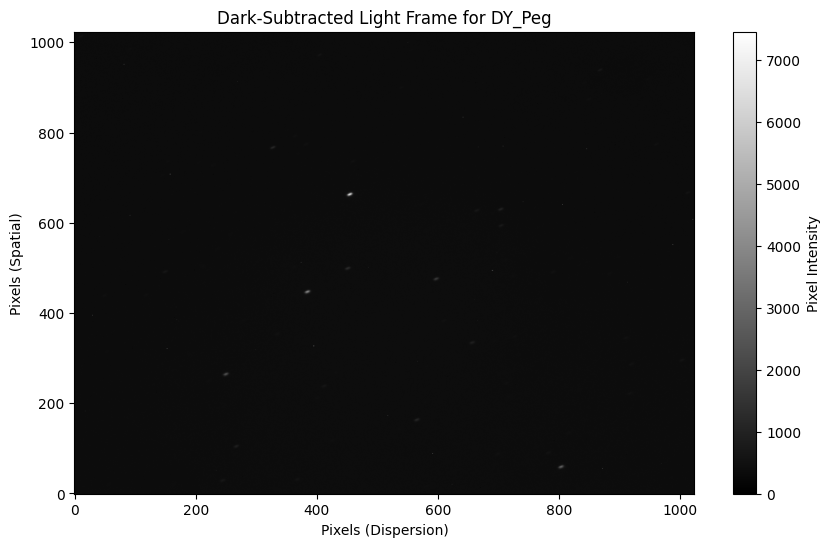

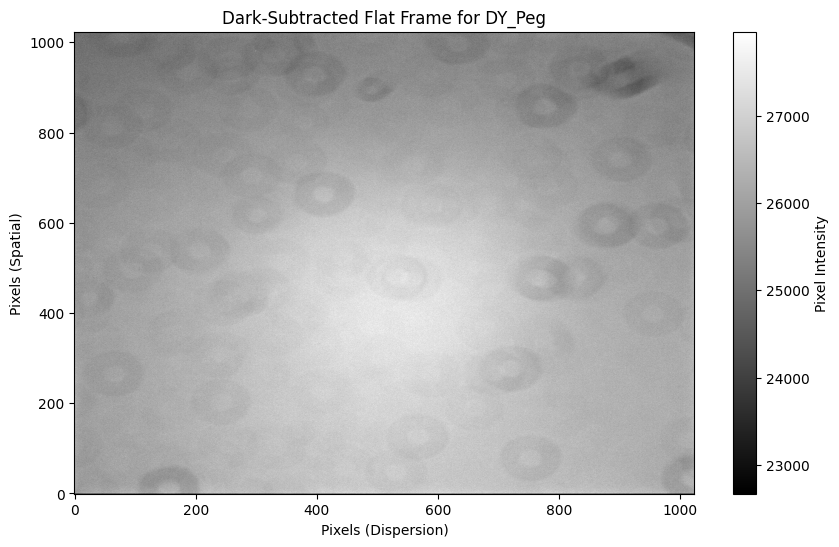

In [79]:
# Load the light and flat frames for DY_Peg
light_frames_dy_peg = read_fits_range(
    dy_peg_light_frame_template, dy_peg_light_frame_start_index, dy_peg_light_frame_end_index
    )

flat_frames_dy_peg = read_fits_range(
    dy_peg_flat_frame_template, dy_peg_flat_frame_start_index, dy_peg_flat_frame_end_index
    )

# Subtracting the master dark frames from DY Peg light and flats 
light_frames_dark_subtracted_dy_peg = subtract_master_dark(
    light_frames_dy_peg, dy_peg_master_dark_l, "Light", "DY_Peg"
)

flat_frames_dark_subtracted_dy_peg = subtract_master_dark(
    flat_frames_dy_peg, dy_peg_master_dark_f, "Flat", "DY_Peg"
)

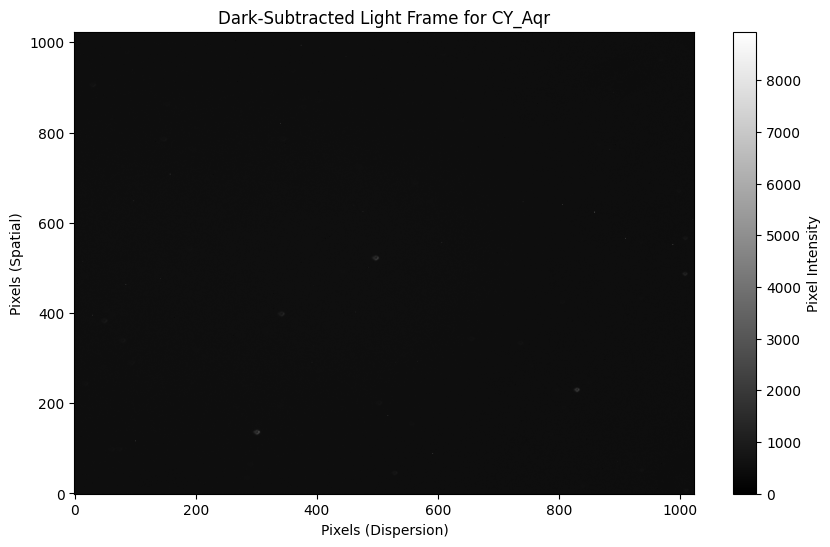

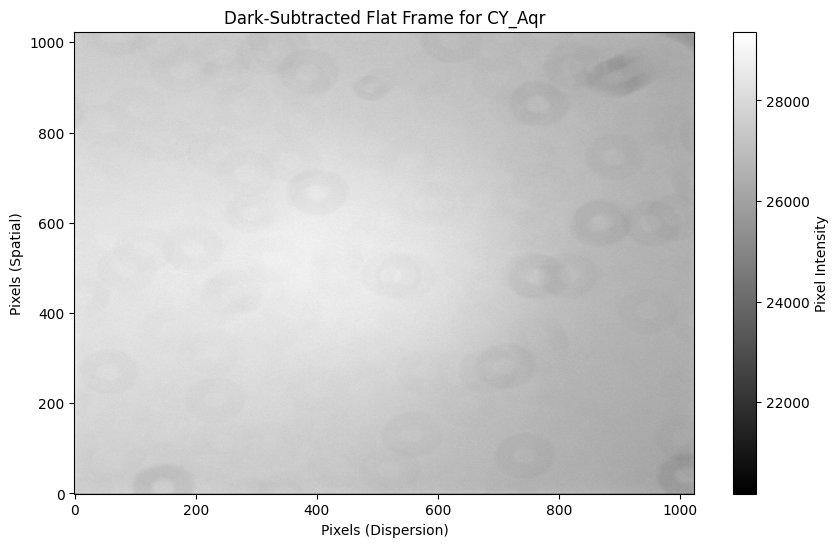

In [80]:
# Load the light and flat frames for CY_Aqr
light_frames_cy_aqr = read_fits_range(
    cy_aqr_light_frame_template, cy_aqr_light_frame_start_index, cy_aqr_light_frame_end_index
    )

flat_frames_cy_aqr = read_fits_range(
    cy_aqr_flat_frame_template, cy_aqr_flat_frame_start_index, cy_aqr_flat_frame_end_index
    )

# Subtracting the master dark frames from CY_Aqr light and flats 
light_frames_dark_subtracted_cy_aqr = subtract_master_dark(
    light_frames_cy_aqr, cy_aqr_master_dark_l, "Light", "CY_Aqr"
)

flat_frames_dark_subtracted_cy_aqr = subtract_master_dark(
    flat_frames_cy_aqr, cy_aqr_master_dark_f, "Flat", "CY_Aqr"
)

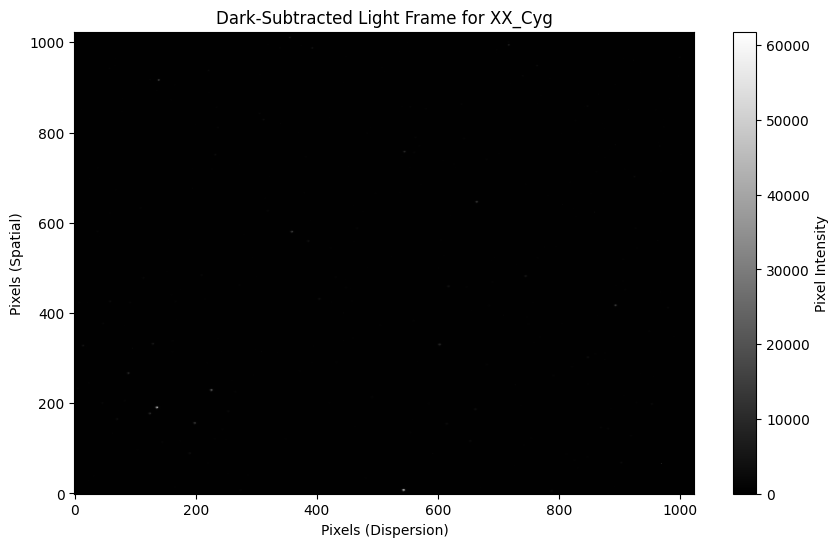

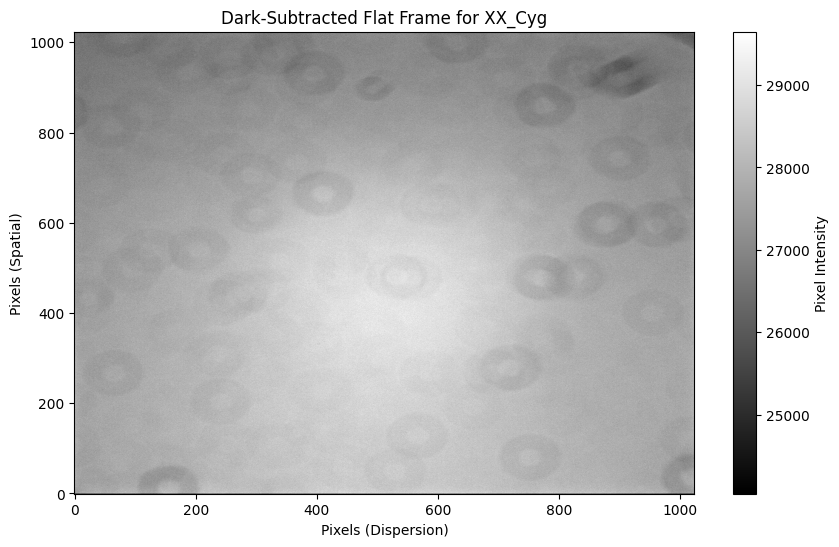

In [81]:
# Load the light and flat frames for XX_Cyg
light_frames_xx_cyg = read_fits_range(
    xx_cyg_light_frame_template, xx_cyg_light_frame_start_index, xx_cyg_light_frame_end_index
    )

flat_frames_xx_cyg = read_fits_range(
    xx_cyg_flat_frame_template, xx_cyg_flat_frame_start_index, xx_cyg_flat_frame_end_index
    )

# Subtracting the master dark frames from XX_Cyg light and flats 
light_frames_dark_subtracted_xx_cyg = subtract_master_dark(
    light_frames_xx_cyg, xx_cyg_master_dark_l, "Light", "XX_Cyg"
)

flat_frames_dark_subtracted_xx_cyg = subtract_master_dark(
    flat_frames_xx_cyg, xx_cyg_master_dark_f, "Flat", "XX_Cyg"
)

In [82]:
def create_normalized_master_flat(flat_frames_dark_subtracted, star_name):
    """
    Create and plot a normalized master flat field for a given star from dark-corrected flat frames.

    :param flat_frames_dark_subtracted: List of tuples with headers and dark-corrected flat field data.
                                        Each tuple has the format (header, data), where `data` is a 2D numpy array.
    :type flat_frames_dark_subtracted: list of tuples
    :param star_name: Name of the star for which the normalized master flat is created.
    :type star_name: str
    :return: Normalized master flat field as a 2D numpy array.
    :rtype: np.ndarray
    """
    # Combine the dark-corrected flat frames to create a master flat field
    master_flat = np.median(np.stack([frame[1] for frame in flat_frames_dark_subtracted]), axis=0)
    # Compute the mode value of the master flat field's pixel intensities
    mode_value = stats.mode(master_flat.flatten(), keepdims=True)[0][0]
    # Normalize the master flat field by dividing by the mode value
    normalized_master_flat = master_flat / mode_value

    # Plot the normalized master flat field
    plt.figure(figsize=(10, 6))
    plt.imshow(normalized_master_flat, cmap='gray', origin='lower', aspect='auto')
    plt.colorbar(label='Pixel Intensity')
    plt.xlabel('Pixels (Dispersion)')
    plt.ylabel('Pixels (Spatial)')
    plt.title(f'Normalized Master Dark-Corrected Flat Field ({star_name})')
    plt.grid(False)
    plt.show()

    return normalized_master_flat

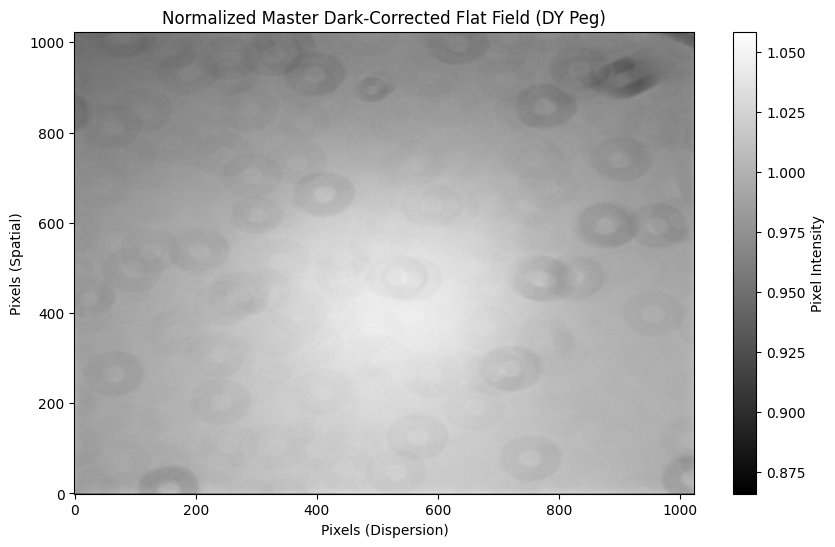

In [ ]:
# Make the normalized master flat fields for DY Peg 
normalized_master_flat_DY_Peg = create_normalized_master_flat(flat_frames_dark_subtracted_dy_peg, "DY_Peg")

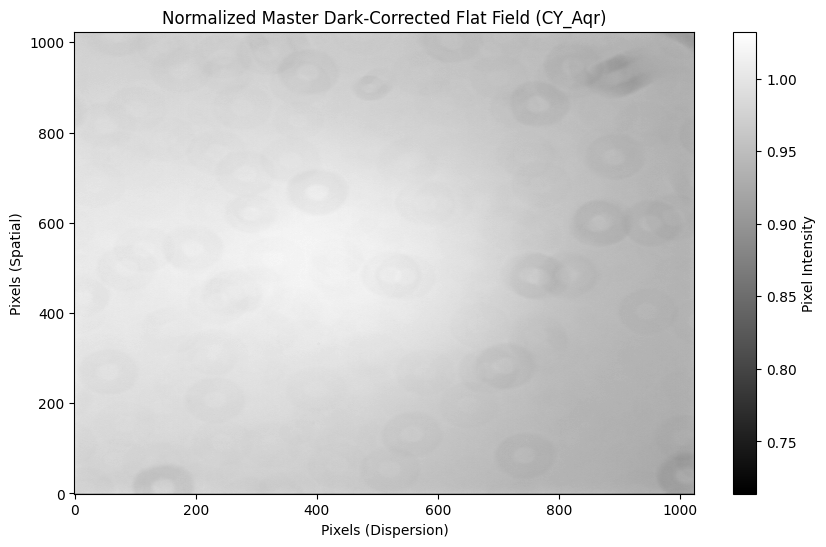

In [84]:
# Make the normalized master flat fields for CY_Aqr
normalized_master_flat_CY_Aqr = create_normalized_master_flat(flat_frames_dark_subtracted_cy_aqr, "CY_Aqr")

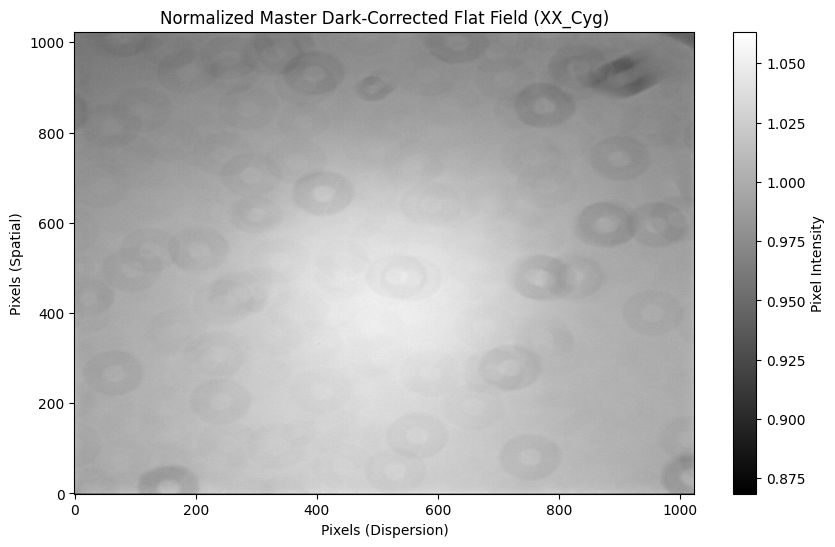

In [85]:
# Make the normalized master flat fields for XX_Cyg
normalized_master_flat_XX_Cyg = create_normalized_master_flat(flat_frames_dark_subtracted_xx_cyg, "XX_Cyg")

In [86]:
def apply_flat_correction(light_frames_dark_subtracted, normalized_master_flat, star_name):
    """
    Apply master flat field correction to dark-corrected light frames for a given star.
    The function also visualizes the corrected light frame for the first frame in the list.

    :param light_frames_dark_subtracted: List of tuples with headers and dark-corrected light frame data.
                                         Each tuple has the format (header, data), where `data` is a 2D numpy array.
    :type light_frames_dark_subtracted: list of tuples
    :param normalized_master_flat: Mode-normalized master flat field for flat field correction.
    :type normalized_master_flat: np.ndarray
    :param star_name: Name of the star for which flat correction is applied.
    :type star_name: str
    :return: List of tuples with headers and flat-corrected light frame data.
    :rtype: list of tuples
    """
    # Apply the master flat to each dark-corrected light frame
    flat_corrected_frames = [
        (header, data / normalized_master_flat) 
        for header, data in light_frames_dark_subtracted
    ]
    
    # Visualize the first flat-corrected light frame
    plt.figure(figsize=(10, 6))
    plt.imshow(flat_corrected_frames[0][1], cmap='gray', origin='lower', aspect='auto', vmax=1500)
    plt.colorbar(label='Pixel Intensity')
    plt.xlabel('Pixels (Dispersion)')
    plt.ylabel('Pixels (Spatial)')
    plt.title(f'Flat-Corrected Light Frame ({star_name})')
    plt.grid(False)
    plt.show()

    return flat_corrected_frames

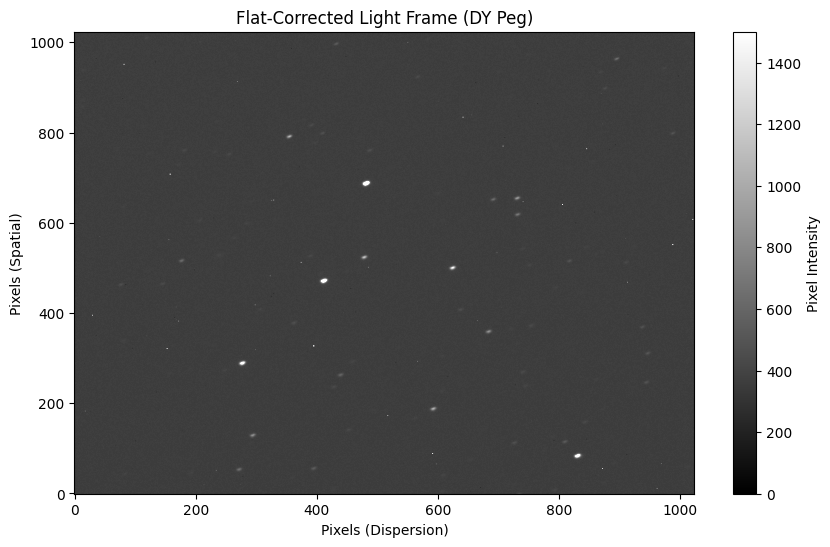

In [ ]:
# Make the fully corrected light frames for DY_Peg
light_frames_flat_corrected_DY_Peg = apply_flat_correction(
    light_frames_dark_subtracted_dy_peg, normalized_master_flat_DY_Peg, "DY_Peg")

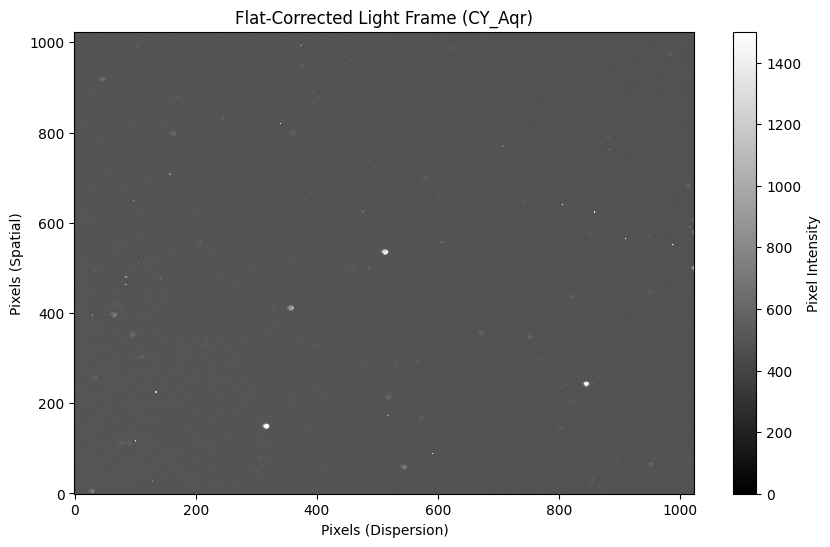

In [88]:
# Make the fully corrected light frames for CY_Aqr 
light_frames_flat_corrected_Cy_Aqr = apply_flat_correction(
    light_frames_dark_subtracted_cy_aqr, normalized_master_flat_CY_Aqr, "CY_Aqr")

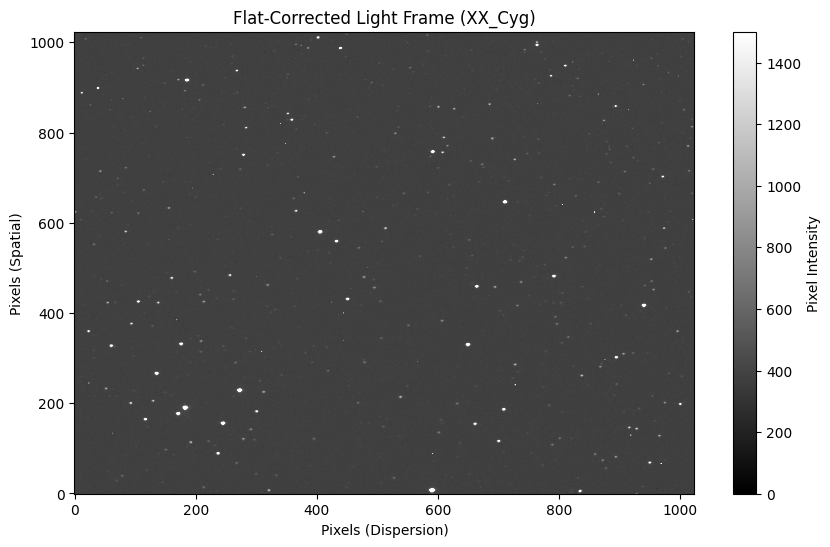

In [89]:
# Make the fully corrected light frames for XX_Cyg
light_frames_flat_corrected_XX_Cyg = apply_flat_correction(
    light_frames_dark_subtracted_xx_cyg, normalized_master_flat_XX_Cyg, "XX_Cyg")

In [93]:
def save_corrected_light_frames(corrected_light_frames, star_name, save_directory_base=r"..\FITS_Files_Corrected\Nov_5_DY_Peg"):
    """
    Save each flat-corrected light frame for a given star as an individual FITS file in the specified directory.

    :param corrected_light_frames: List of tuples with headers and flat-corrected light frame data.
                                   Each tuple has the format (header, data), where `data` is a 2D numpy array.
    :type corrected_light_frames: list of tuples
    :param star_name: Name of the star for which the corrected light frames are being saved.
    :type star_name: str
    :param save_directory_base: Base directory where the individual corrected light frames will be saved.
                                The corrected frames will be saved directly in this directory without any subfolders.
    :type save_directory_base: str
    :return: None
    :rtype: None
    """
    # Ensure the save directory exists
    os.makedirs(save_directory_base, exist_ok=True)

    for i, (header, data) in enumerate(corrected_light_frames):
        # Define the filename for each frame based on its series number
        filename = os.path.join(save_directory_base, f"{star_name}_corrected_frames_{i:04d}.fits")
        # Create a new FITS HDU with the corrected data and the original header
        hdu = fits.PrimaryHDU(data=data, header=header)
        # Write the FITS file to disk
        hdu.writeto(filename, overwrite=True)
        
        print(f"Saved {filename}")

In [ ]:
# Saving the fully corrected light frames for DY_Peg
save_corrected_light_frames(
    light_frames_flat_corrected_DY_Peg, 
    "DY_Peg", save_directory_base=r"..\FITS_Files_Corrected\Nov_5_DY_Peg"
)

Saved ..\FITS_Files_Corrected\Nov_5_DY_Peg\DY_Peg_corrected_frames_0000.fits
Saved ..\FITS_Files_Corrected\Nov_5_DY_Peg\DY_Peg_corrected_frames_0001.fits
Saved ..\FITS_Files_Corrected\Nov_5_DY_Peg\DY_Peg_corrected_frames_0002.fits
Saved ..\FITS_Files_Corrected\Nov_5_DY_Peg\DY_Peg_corrected_frames_0003.fits
Saved ..\FITS_Files_Corrected\Nov_5_DY_Peg\DY_Peg_corrected_frames_0004.fits
Saved ..\FITS_Files_Corrected\Nov_5_DY_Peg\DY_Peg_corrected_frames_0005.fits
Saved ..\FITS_Files_Corrected\Nov_5_DY_Peg\DY_Peg_corrected_frames_0006.fits
Saved ..\FITS_Files_Corrected\Nov_5_DY_Peg\DY_Peg_corrected_frames_0007.fits
Saved ..\FITS_Files_Corrected\Nov_5_DY_Peg\DY_Peg_corrected_frames_0008.fits
Saved ..\FITS_Files_Corrected\Nov_5_DY_Peg\DY_Peg_corrected_frames_0009.fits
Saved ..\FITS_Files_Corrected\Nov_5_DY_Peg\DY_Peg_corrected_frames_0010.fits
Saved ..\FITS_Files_Corrected\Nov_5_DY_Peg\DY_Peg_corrected_frames_0011.fits
Saved ..\FITS_Files_Corrected\Nov_5_DY_Peg\DY_Peg_corrected_frames_0012.fits

In [95]:
# Saving the fully corrected light frames for DY_Peg
save_corrected_light_frames(
    light_frames_flat_corrected_Cy_Aqr, 
    "CY_Aqr", save_directory_base=r"..\FITS_Files_Corrected\Nov_7_CY_Aqr"
)

Saved ..\FITS_Files_Corrected\Nov_7_CY_Aqr\CY_Aqr_corrected_frames_0000.fits
Saved ..\FITS_Files_Corrected\Nov_7_CY_Aqr\CY_Aqr_corrected_frames_0001.fits
Saved ..\FITS_Files_Corrected\Nov_7_CY_Aqr\CY_Aqr_corrected_frames_0002.fits
Saved ..\FITS_Files_Corrected\Nov_7_CY_Aqr\CY_Aqr_corrected_frames_0003.fits
Saved ..\FITS_Files_Corrected\Nov_7_CY_Aqr\CY_Aqr_corrected_frames_0004.fits
Saved ..\FITS_Files_Corrected\Nov_7_CY_Aqr\CY_Aqr_corrected_frames_0005.fits
Saved ..\FITS_Files_Corrected\Nov_7_CY_Aqr\CY_Aqr_corrected_frames_0006.fits
Saved ..\FITS_Files_Corrected\Nov_7_CY_Aqr\CY_Aqr_corrected_frames_0007.fits
Saved ..\FITS_Files_Corrected\Nov_7_CY_Aqr\CY_Aqr_corrected_frames_0008.fits
Saved ..\FITS_Files_Corrected\Nov_7_CY_Aqr\CY_Aqr_corrected_frames_0009.fits
Saved ..\FITS_Files_Corrected\Nov_7_CY_Aqr\CY_Aqr_corrected_frames_0010.fits
Saved ..\FITS_Files_Corrected\Nov_7_CY_Aqr\CY_Aqr_corrected_frames_0011.fits
Saved ..\FITS_Files_Corrected\Nov_7_CY_Aqr\CY_Aqr_corrected_frames_0012.fits